<a href="https://colab.research.google.com/github/erhansozen/Assignments-LearningPortfolio/blob/main/KC_House_Data_questions_chapter2_student_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [1]:
import pandas as pd
from google.colab import drive #allows us to reach our google drive
from google.colab import data_table #allows us data table below that cell
import matplotlib.pyplot as plt #visualization
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/kc_house_data.csv")

data.head(10) #first 10 raws of dataset

Mounted at /content/drive


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

▶**A machine learning pipeline** is a sequence of data processing components. The pipelines are very popular in ML systems because there is thousands of data to manipulate and transformations to apply.

Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

▶ This is **a supervised learning** because we have labeled dataset to train. Also, this is **regression** since our model will use **prediction**.

What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?

▶In linear regression models uses **root mean square error (RMSE)** as a performance measure. It shows us how much error the system makes in its prediction with a higher weight given to large errors.

MSE (Mean Squared Error): lineer regresyon doğrusunda noktaların doğruya olan uzaklığı kare şekline getirilip hesaplanıyor.

MAE (Mean Absolute Error): bunda da lineer regresyon doğrunda noktaların direkt uzaklığı bulunuyor.

##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

▶ WE COULDN'T SEE THE DIFFERENCES FOR THE LAST QUESTION


In [ ]:
# YOUR TASK
data.head()
data.describe()
data.info()

#%25,%50,%75 tanımları Boxplot grafiğinden geliyor aslında.
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

▶Each variable has its own scale

▶Machine learning models work better with not skewed datasets
(sağ veya sola skewed olmuş modellerle cok iyi calismayabiliyor)

<Axes: >

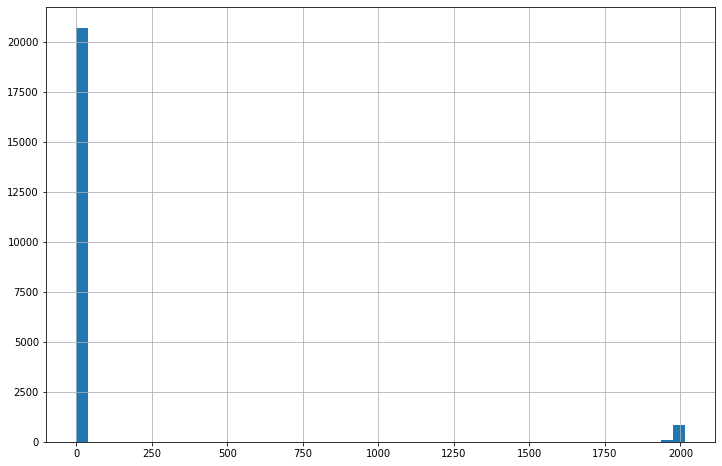

In [ ]:
# YOUR TASK
data["yr_renovated"].hist(bins=50, figsize=(12,8))

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [2]:
# Some Data Cleaning
data['renovated'] = pd.cut(data['yr_renovated'], labels= [0,1], bins= [-1, 0, 2023]) #.clip(0,1) komutu .cut() func ile nerdeyse aynı
data['yr_renovated'] = data[['yr_built','yr_renovated']].max(axis=1) #each row a year with the
data['date'] = pd.to_datetime(data['date']) #it changes the datatype to datetime
data.head(20)

#data['renovated'] = pd.cut(x=data['yr_renovated'], bins=[-1, 1, 2099], labels) hocanın cozumu
#


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,0
5,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,2001,98053,47.6561,-122.005,0
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,1995,98003,47.3097,-122.327,0
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,1963,98198,47.4095,-122.315,0
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,1960,98146,47.5123,-122.337,0
9,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,2003,98038,47.3684,-122.031,0


In [4]:
print(data.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
renovated        0
dtype: int64


##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

▶We need a validation set for overfitting.

In [22]:
'''from sklearn.model_selection import train_test_split
import numpy as np
#I couldn't create extra columns for train and test sets
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(data, 0.2)

train_set = train_set.copy()
test_set = test_set.copy()'''

RandomForestRegressor()

Mean Squared Error: 21488581832.244686
R-squared: 0.8511526072236106


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

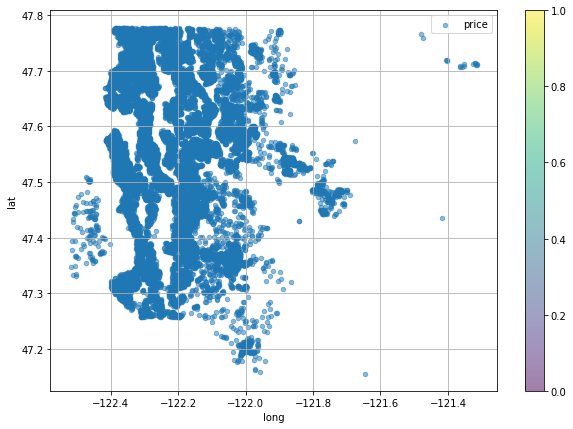

In [ ]:
# YOUR TASK
data.plot(kind="scatter", x="long", y="lat", grid=True,
          label="price", cmap="jet", colorbar=True,
          legend=True, sharex=False, figsize=(10,7),
          alpha=0.5
          
          )
#hue='categories' harita rengi icin
#palette
#alpha for transparency

plt.show()

### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

In [ ]:
# YOUR TASK
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)
#sqft_living ve grade will be the best predictor feature for model

price            1.000000
sqft_living      0.702738
grade            0.665150
sqft_above       0.605096
bathrooms        0.524850
view             0.401843
sqft_basement    0.328442
bedrooms         0.315214
lat              0.304132
waterfront       0.275366
floors           0.256274
yr_renovated     0.103802
sqft_lot         0.090080
yr_built         0.051837
condition        0.039441
long             0.021439
zipcode         -0.050593
Name: price, dtype: float64

Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

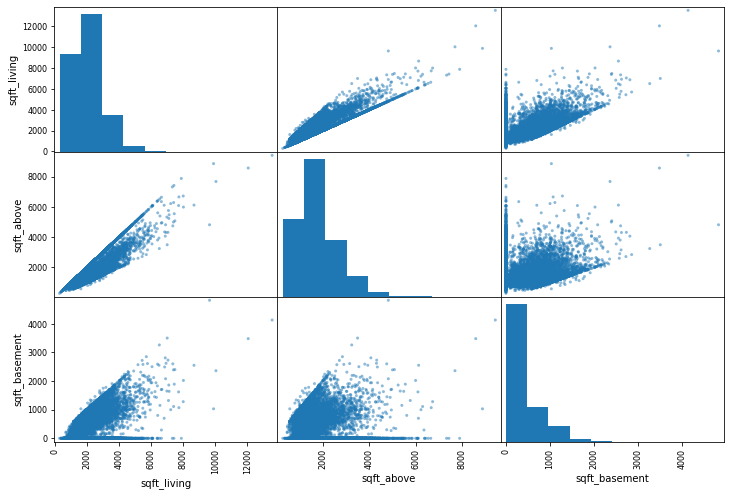

In [ ]:
#YOUR TASK
from pandas.plotting import scatter_matrix
corr_attributes = ["sqft_living", "sqft_above", "sqft_basement"]
scatter_matrix(data[corr_attributes], figsize=(12,8))
plt.show()

#bu da also important find for the best predictors
#what characteristics for sqrft_living vs sqft_above bu ikisinin ortak grafiginde cizgi olmasinin nedeni, evlerin en az 1 odasi olması, sqft_living ile sqft_basement arasındaki cizgi
#olmasinin nedeni ise bazi evlerin basement'i olup bazilarinin olmamasi

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [ ]:
#YOUR TASK
data["sqft_living_per_bedrooms"] = data["bedrooms"] / data["sqft_living"]
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

#

price                       1.000000
sqft_living                 0.702738
grade                       0.665150
sqft_above                  0.605096
bathrooms                   0.524850
view                        0.401843
sqft_basement               0.328442
bedrooms                    0.315214
lat                         0.304132
waterfront                  0.275366
floors                      0.256274
yr_renovated                0.103802
sqft_lot                    0.090080
yr_built                    0.051837
condition                   0.039441
long                        0.021439
zipcode                    -0.050593
sqft_living_per_bedrooms   -0.479708
Name: price, dtype: float64

##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()
#we're copying the dataset to target and train,

###Missing Data

What options do we have to deal with missing values? What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

▶ We have three options to rid of this missing values.
First: We can delete the corresponding districts
Second: We can delete the whole attribute
Third: We can set the missing value with values which they won't effect the statistical meaning of dataset such as zero, the mean or median)

▶ SimpleImputer function keeps the median value of each feature, so it will helps us to impute missing values on the validation set, the test set, and on the new data fed to the model.

⚛

In [ ]:
#YOUR TASK: Write a code that give all lines, which have any missing value. 
print(data.isnull().values.any())

False


###Handling Text and Categorical Attributes


What are ordinal and categorical data? Do we have such data in our data set? What possibilities do we have to transform this data correctly? What are dummy attributes? Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

⚛How to deal with categorical or text data? Ordinal data birbirleri arasinda oneme sahip olan degiskenlerdir, ornegin 1 ile 5 arasinda puanlyın 1 cok kotu 5 en iyi seklindedir. Categorical ise renkler gibi aralarinda bir iliski yok yani siralayamazsin.

# Dummy attributes: This dummy attributes will be square matrix the variables. 
# Aslında burda waterfront kolonu zaten onehotencode yapılmış gibi birşey, sadece numpyfloat64 değişkenine çevirmeye çalışıyouz daha hızlı çalışması için.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_waterfronted = data[["waterfront"]]
waterfront_encoded = cat_encoder.fit_transform(data_waterfronted)

data["waterfront"].head(10)

13777    0
20919    0
16576    0
61       0
6117     0
1868     0
13339    0
9913     0
205      0
10361    0
Name: waterfront, dtype: int64

##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

In [ ]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated'],
      dtype='object')

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! Try to understand the following two code blocks, how are the variables *long* and *lat* converted?

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


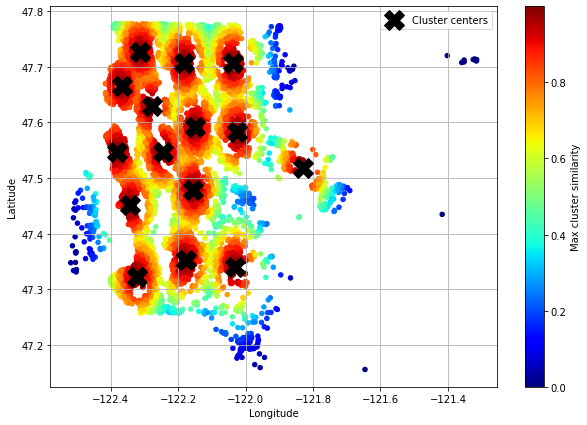

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

In [ ]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

(17291, 31)

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

In [ ]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

In [ ]:
# Your task
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(data_label_transformed, data_predictions, squared=False)
lin_rmse

0.19820387426874742


###Random Forest Regression

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Preprocess the data
X = data.drop(['date', 'price'], axis=1)
y = data['price']
X = pd.get_dummies(X, columns=['waterfront', 'view', 'condition', 'grade'], drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the random forest model
rf = RandomForestRegressor()

# Train the random forest model
rf.fit(X_train, y_train)


RandomForestRegressor()

In [34]:
# Evaluate the performance of the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


# Fine-tune the hyperparameters of the model
#param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
#grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
#grid.fit(X_train, y_train)
#print("Best parameters:", grid.best_params_)
#print("Best score:", grid.best_score_)

# Use the trained model to make predictions on new data
#new_data = X.iloc[:10, :]
#new_data_scaled = scaler.transform(new_data)
#new_pred = rf.predict(new_data_scaled)
#print("New predictions:", new_pred)

Mean Squared Error: 21756023711.4743
R-squared: 0.8493000872782128


In [ ]:
#This code loads the House Sales in King County dataset, explores the data, preprocesses it by converting categorical variables into dummy variables and scaling numerical variables, and splits the data into training and testing sets. 
#Then, it defines a random forest regression model, trains it, evaluates its performance using mean squared error and R-squared, and fine-tunes its hyperparameters using cross-validation and grid search.
#Finally, it uses the trained model to make predictions on new data.



```
# Bu, kod olarak biçimlendirilmiştir
```

###Support Vector Regression

In [33]:
from sklearn.svm import SVR
# Define the support vector regression model
svr = SVR()

# Train the support vector regression model
svr.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 153302112126.9505
R-squared: -0.06189509737537979


###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation? Why have I adjusted the R squared error with a separate function? What is the function *np.ravel* doing?

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

In [ ]:
pd.Series(forest_rmses).describe()

count        10.000000
mean    -130089.198037
std       15619.187393
min     -155580.132370
25%     -137097.972598
50%     -127564.381111
75%     -117434.958242
max     -111022.520113
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do. What are the advantages of each method. For which parameters would this make sense in our example?

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:
# Your TASK
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Try to save our learned model so that we can reload it at any time.

In [ ]:
# Your task
import joblib
joblib.dump(forest_reg, "my_housing_model.pkl")

['my_housing_model.pkl']

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 